In [ ]:
!git clone https://github.com/Fung-Lab/ActiveStructOpt.git

Cloning into 'ActiveStructOpt'...
remote: Enumerating objects: 312, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 312 (delta 26), reused 39 (delta 10), pack-reused 248
Receiving objects: 100% (312/312), 716.15 KiB | 8.05 MiB/s, done.
Resolving deltas: 100% (158/158), done.


In [ ]:
%cd ActiveStructOpt
!pip install -r requirements.txt --quiet
!pip install -e . --quiet

/content/ActiveStructOpt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.7/423.7 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.3/154.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import activestructopt.dataset.materialsproject
import activestructopt.dataset.rdf
import activestructopt.optimization.nlopt.nlopt
from pymatgen.core.composition import Composition
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
target_structure = activestructopt.dataset.materialsproject.get_structure('mp-22526', 'YOUR_API_KEY_HERE')

In [ ]:
starting_structure = target_structure.copy()
starting_structure.perturb(0.5)

In [ ]:
rs = np.arange(0.001, 12.0, 0.001)
exp = activestructopt.dataset.rdf.get_rdf(target_structure, σ = 0.1)

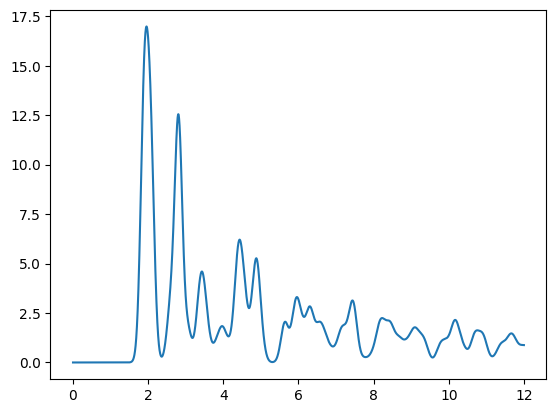

In [ ]:
plt.plot(rs, exp)

In [ ]:
optstruct = activestructopt.optimization.nlopt.nlopt.run_nlopt(
  activestructopt.dataset.rdf.get_rdf,
  {'σ': 0.1},
  exp,
  starting_structure.copy(),
  5000,
)

Text(0, 0.5, 'Radial Distribution Function')

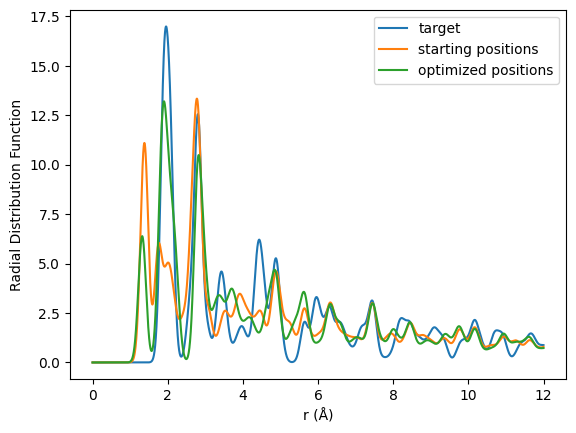

In [ ]:
plt.plot(rs, exp, label = "target")
plt.plot(rs, activestructopt.dataset.rdf.get_rdf(starting_structure, σ = 0.1), label = "starting positions")
plt.plot(rs, activestructopt.dataset.rdf.get_rdf(optstruct, σ = 0.1), label = "optimized positions")
plt.legend()
plt.xlabel('r (Å)')
plt.ylabel('Radial Distribution Function')